# Ford GoBike System Data

## by Abdullahi Adedayo

## Investigation Overview


> Checking the distribution of durations in an appropriate measurement Viewing the number of rides per day and per month Visualizing the ride duration per day and for each user type.

## Dataset Overview

> This dataset provides information about the bikes trips, users, trip durations ,start date and time, end station and bikes IDs.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
tripdata = pd.read_csv('fordgobike-tripdata.csv', parse_dates =['start_time', 'end_time'])

In [3]:
#Changing user_type, member_gender and bike_share_for_all_trip to categorical datatype 
tripdata['user_type'] = tripdata['user_type'].astype('category')
tripdata['member_gender'] = tripdata['member_gender'].astype('category')
tripdata['bike_share_for_all_trip'] = tripdata['bike_share_for_all_trip'].astype('category')
tripdata['start_station_name'] = tripdata['start_station_name'].astype('category')

In [4]:
tripdata['day'] = tripdata['start_time'].dt.day_name()

In [5]:
# convert day column to ordinal category
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 
                    'Sunday']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = days_of_week)
tripdata['day'] = tripdata['day'].astype(ordered_var)

In [6]:
this_year = 2022
tripdata['age'] = this_year - tripdata['member_birth_year']

In [9]:
# creating trip duration variable in minute
tripdata['duration_min'] = tripdata['duration_sec'] / 60

In [7]:
base_color = sns.color_palette()[0]

## (Trip Duration in Minute)

> This plot was made using logarithmic scaleon the x axis. The duration values seem to be normally distributed. It is clear that durations mostly are between 5 to 15 minutes as most of the points lie between those boundaries. values around 500 are also present but it seems impossible to ride for upto half a day therefore these values are mostly outliers


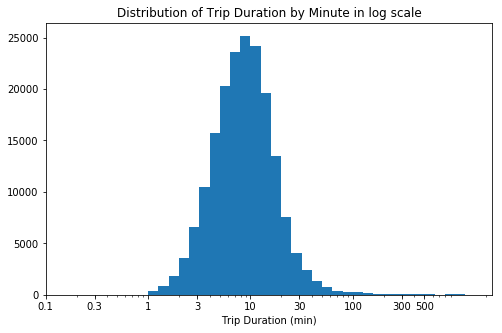

In [10]:
# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(tripdata['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300,500]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = tripdata, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.title('Distribution of Trip Duration by Minute in log scale')
plt.show();

## (Day count trip)

> This plot shows that most trip took place during midweek due to the fact that most Thursday and Tuesday have the highest trips while their are minimum number of trips during weekends as Saturday and Sunday recorded fewest trips

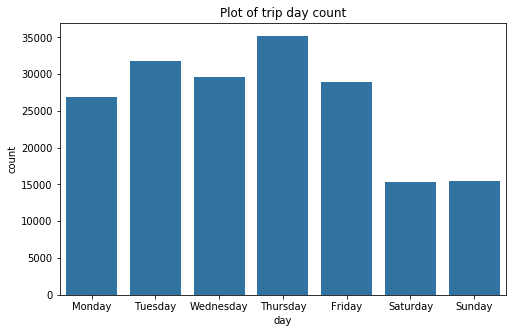

In [11]:
plt.figure(figsize=[8, 5])
sns.countplot(data = tripdata, x = 'day', color = base_color)
plt.title('Plot of trip day count');

## (Types of bike users)

> As shown below, the subscribers have the higher percentage compare to the Customer users

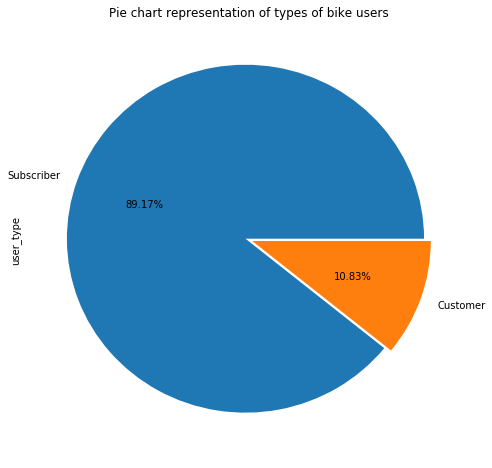

In [12]:
tripdata['user_type'].value_counts().plot(kind = 'pie', 
                                              figsize = [8, 8],
                                              explode = [0.02, 0.02], 
                                              autopct = '%1.2f%%', 
                                              title = 'Pie chart representation of types of bike users');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert fordgobike-tripdata2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook fordgobike-tripdata2.ipynb to slides
[NbConvertApp] Writing 330445 bytes to fordgobike-tripdata2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/fordgobike-tripdata2.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
